In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import pickle
from collections import Counter
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split
import re
import seaborn as sns
import datetime

In [2]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is D812-1956

 Directory of C:\Code Playground\Cognizance iit rorkee

17-03-2023  02:45    <DIR>          .
17-03-2023  02:22    <DIR>          ..
12-03-2023  20:39    <DIR>          .ipynb_checkpoints
12-03-2023  20:39                23 .jovianrc
12-03-2023  20:30    <DIR>          CCD DATA SET z-1
12-03-2023  20:31    <DIR>          CCD DATA SET z-2
11-03-2023  19:51         4,160,554 CCD_2023 Final.pdf
17-03-2023  02:43         1,447,154 Cloud Coverage Determination .ipynb
17-03-2023  02:42    <DIR>          Cloud_coverage.model
16-03-2023  11:47               796 Garbage_image.csv
16-03-2023  11:47           141,402 image_indexes.csv
16-03-2023  12:24     1,878,570,169 IMG_features.pickle
16-03-2023  12:24           501,681 label.pickle
16-03-2023  11:47         1,714,869 UsefulData_Dsoptimized.csv
16-03-2023  19:16         1,670,004 X_features.pickle
               9 File(s)  1,888,206,652 bytes
               6 Dir(s)  201,005,686,

In [3]:
DATASETPATH1="CCD DATA SET z-1"
DATASETPATH2="CCD DATA SET Z-2"
print(len(os.listdir(DATASETPATH1)));print(len(os.listdir(DATASETPATH2)))

304
35


In [4]:
os.listdir(DATASETPATH1)

['0101',
 '0102',
 '0103',
 '0104',
 '0105',
 '0106',
 '0107',
 '0108',
 '0109',
 '0110',
 '0111',
 '0112',
 '0113',
 '0114',
 '0115',
 '0116',
 '0117',
 '0118',
 '0119',
 '0120',
 '0121',
 '0122',
 '0123',
 '0124',
 '0125',
 '0126',
 '0127',
 '0128',
 '0129',
 '0130',
 '0131',
 '0201',
 '0202',
 '0203',
 '0204',
 '0205',
 '0206',
 '0207',
 '0208',
 '0209',
 '0210',
 '0211',
 '0212',
 '0214',
 '0215',
 '0216',
 '0217',
 '0218',
 '0219',
 '0220',
 '0221',
 '0222',
 '0223',
 '0224',
 '0225',
 '0227',
 '0228',
 '0229',
 '0302',
 '0303',
 '0304',
 '0305',
 '0306',
 '0307',
 '0308',
 '0309',
 '0310',
 '0311',
 '0312',
 '0315',
 '0318',
 '0319',
 '0321',
 '0322',
 '0325',
 '0326',
 '0327',
 '0328',
 '0329',
 '0330',
 '0331',
 '0401',
 '0402',
 '0403',
 '0406',
 '0407',
 '0408',
 '0409',
 '0410',
 '0411',
 '0412',
 '0415',
 '0417',
 '0418',
 '0419',
 '0420',
 '0421',
 '0422',
 '0424',
 '0425',
 '0426',
 '0427',
 '0429',
 '0430',
 '0501',
 '0502',
 '0503',
 '0504',
 '0506',
 '0507',
 '0508',
 

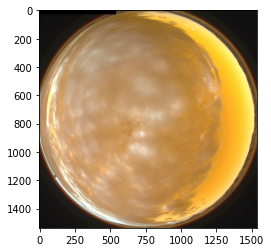

(1536, 1536, 3)


In [5]:
for IMGDIR in os.listdir(DATASETPATH1):
    IMGPATH=os.path.join(DATASETPATH1,IMGDIR)
    for IMG in os.listdir(IMGPATH):
        img=cv.imread(os.path.join(IMGPATH,IMG),cv.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        print(img.shape)
        break
    break
    

### PreProcessing

In [6]:
Dataset=pd.read_csv("CCD DATA SET z-1/train.csv", low_memory=False)

In [7]:
Dataset.shape

(527040, 17)

In [8]:
Dataset.dropna(inplace=True)

In [9]:
Dataset

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498235,12-Nov,23:55,-1.078740,1.180110,0.39217,-7.266,-7.942,-9.442,82.60,0.0,0.00,0.0,812.966,0.0,2.805,0.0,0.0
498236,12-Nov,23:56,-1.098090,1.155420,1.19514,-7.308,-8.052,-9.552,82.10,0.0,0.70,292.0,812.967,0.0,2.800,0.0,0.0
498237,12-Nov,23:57,-1.113540,1.130740,1.99776,-7.421,-8.177,-9.677,82.00,0.0,0.00,0.0,812.956,0.0,2.842,0.0,0.0
498238,12-Nov,23:58,-1.140300,1.180120,2.79979,-7.480,-8.194,-9.694,82.30,0.0,0.00,0.0,812.921,0.0,2.842,0.0,0.0


In [10]:
for IMGDIR in os.listdir(DATASETPATH1):
    IMGPATH=os.path.join(DATASETPATH1,IMGDIR)
    Arr=[]
    for IMG in os.listdir(IMGPATH):
        Arr.append(IMG)
    break
Arr.sort()
len(Arr)

55

In [11]:
Dataset.columns

Index(['DATE (MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Tower RH [%]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Avg Wind Direction @ 6ft [deg from N]',
       'Station Pressure [mBar]', 'Precipitation (Accumulated) [mm]',
       'Snow Depth [cm]', 'Moisture', 'Albedo (CMP11)'],
      dtype='object')

In [12]:
# np.where(Dataset['Total Cloud Cover [%]']==-1)
Counter(Dataset['Total Cloud Cover [%]'])

Counter({0.0: 248275,
         6.0: 4026,
         8.0: 5331,
         10.0: 6072,
         13.0: 5623,
         15.0: 4633,
         19.0: 3376,
         21.0: 2715,
         22.0: 2457,
         23.0: 2383,
         24.0: 2284,
         25.0: 2085,
         29.0: 1592,
         34.0: 1322,
         38.0: 1182,
         42.0: 1153,
         40.0: 1192,
         43.0: 1176,
         41.0: 1180,
         37.0: 1176,
         35.0: 1210,
         30.0: 1485,
         26.0: 1916,
         20.0: 3027,
         17.0: 3963,
         16.0: 4266,
         14.0: 5095,
         18.0: 3655,
         11.0: 6140,
         7.0: 5257,
         12.0: 6271,
         27.0: 1811,
         28.0: 1697,
         9.0: 5863,
         39.0: 1155,
         46.0: 1022,
         52.0: 1081,
         57.0: 1029,
         59.0: 1027,
         64.0: 1064,
         66.0: 1024,
         69.0: 1155,
         71.0: 1157,
         73.0: 1175,
         76.0: 1321,
         77.0: 1379,
         78.0: 1347,
         81.0: 1

In [13]:
np.where(Dataset['DATE (MM/DD)']=='01-Jan')

(array([   0,    1,    2, ..., 1434, 1435, 1436], dtype=int64),)

<AxesSubplot:>

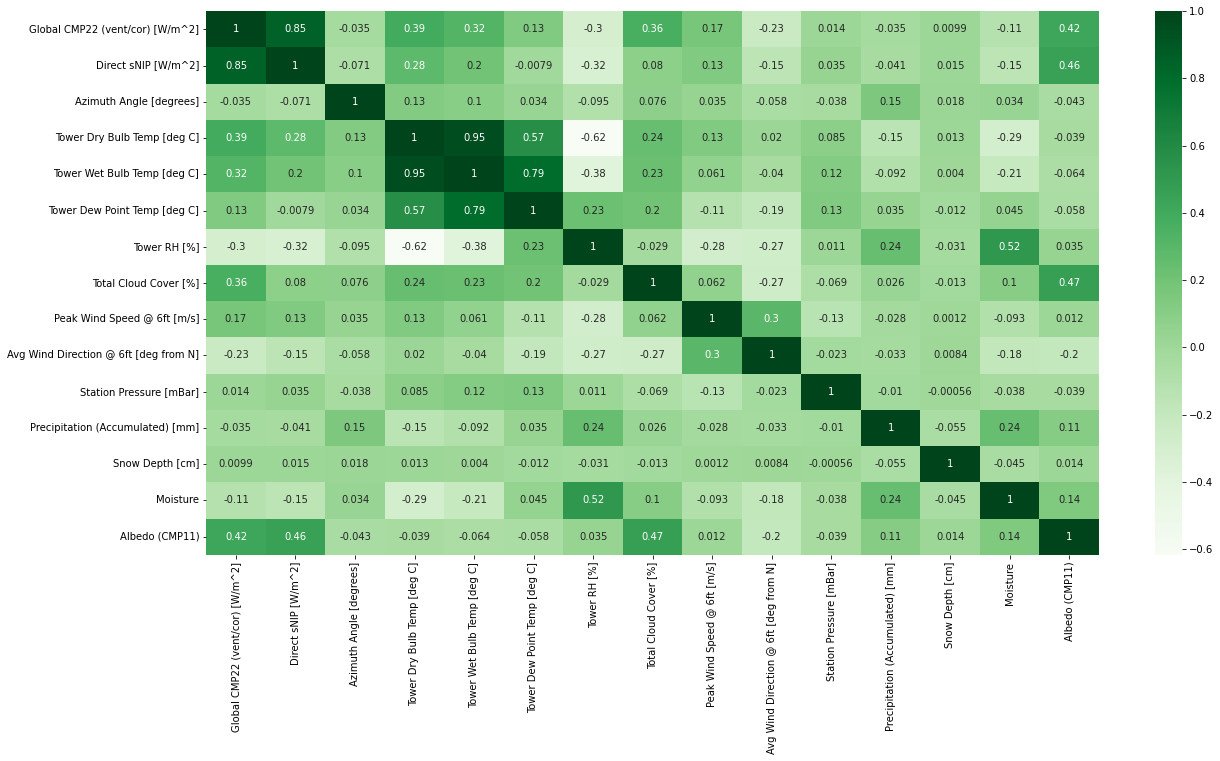

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(Dataset.iloc[:,2:].corr(),annot=True,cmap="Greens")

### we will take the highly correlated variable with target variable for further training data

In [15]:
DsOptimized=Dataset.drop(['Tower RH [%]','Avg Wind Direction @ 6ft [deg from N]','Station Pressure [mBar]','Snow Depth [cm]'],axis=1)

In [16]:
DsOptimized

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,0.0,9.95,0.0,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,0.0,8.20,0.0,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,0.0,6.70,0.0,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,0.0,7.70,0.0,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,0.0,7.20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498235,12-Nov,23:55,-1.078740,1.180110,0.39217,-7.266,-7.942,-9.442,0.0,0.00,0.0,0.0,0.0
498236,12-Nov,23:56,-1.098090,1.155420,1.19514,-7.308,-8.052,-9.552,0.0,0.70,0.0,0.0,0.0
498237,12-Nov,23:57,-1.113540,1.130740,1.99776,-7.421,-8.177,-9.677,0.0,0.00,0.0,0.0,0.0
498238,12-Nov,23:58,-1.140300,1.180120,2.79979,-7.480,-8.194,-9.694,0.0,0.00,0.0,0.0,0.0


In [17]:
Df=pd.DataFrame()
Df

""


In [18]:

for IMGDIR in os.listdir(DATASETPATH1):
    IMGPATH=os.path.join(DATASETPATH1,"0102")
    Date_arr=[]
    time_arr=[]
    for IMG in os.listdir(IMGPATH):
        filename=IMG
        date_str = filename[:4] # '0101'
        time_str = filename[4:] # '140000'
        time_str=time_str.split('.')[0]
        timestamp_str = f'2022{date_str[:2]}{date_str[2:]}{time_str}'
        timestamp = datetime.datetime.strptime(timestamp_str, '%Y%m%d%H%M%S')
        new_date = timestamp.strftime('%m-%d %H:%M')
        Date_arr.append(new_date.split(" ")[0])
        time_arr.append(new_date.split(" ")[1])

    break
    

In [19]:
Date_part=DsOptimized['DATE (MM/DD)']


In [20]:
s="jan-01"
month_str,day_str=s.split("-")
print(month_str,day_str)
s=s.lower()
pattern=r"(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)-\d{2}"
if re.match(pattern,s):
    print("hello")

jan 01
hello


In [21]:
def convert_correct_format(Date):
    Date=Date.lower()
    pattern=r"(jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)-\d{2}"
    if re.match(pattern,Date):
        month_str,day_str=Date.split("-")

        # Convert month string to month number
        month_num = datetime.datetime.strptime(month_str, '%b').month

        # Create datetime object with year set to arbitrary value (e.g. 2000)
        dt = datetime.datetime(2000, month_num, int(day_str))

        # Format datetime object to desired output string
        output_str = dt.strftime('%d-%b')
        return output_str
    return Date

In [22]:
Date_part=list(map(convert_correct_format,Date_part))

In [23]:
Counter(list(map(lambda x:True if re.match(pattern,x.lower()) else False,Date_part)))

Counter({False: 480931})

In [24]:
def numerial_date(Date):
    Date=Date.lower()
    if "jan" in Date:
        return Date.replace("jan","01")
    elif "feb" in Date:
        return Date.replace("feb","02")
    elif "mar" in Date:
        return Date.replace("mar","03")
    elif "apr" in Date:
        return Date.replace("apr","04")
    elif "may" in Date:
        return Date.replace("may","05")
    elif "jun" in Date:
        return Date.replace("jun","06")
    elif "jul" in Date:
        return Date.replace("jul","07")
    elif "aug" in Date:
        return Date.replace("aug","08")
    elif "sep" in Date:
        return Date.replace("sep","09")
    elif "oct" in Date:
        return Date.replace("oct","10")
    elif "nov" in Date:
        return Date.replace("nov","11")
    elif "dec" in Date:
        return Date.replace("dec","12")
    else:
        return Date

In [25]:
Date_part[-1]

'12-nov'

In [26]:
Date_part=list(map(numerial_date,Date_part))
# with open('try.csv','w') as f:
#     f.writelines(Date_part)

In [27]:
DsOptimized['DATE (MM/DD)']=Date_part

In [28]:
print(Date_arr[0],time_arr[0])

01-02 07:40


In [29]:
np.where((DsOptimized["DATE (MM/DD)"]==Date_arr[2])&(DsOptimized["MST"]==time_arr[2]))[0]

array([1917], dtype=int64)

In [30]:
DsOptimized.iloc[480,:]

DATE (MM/DD)                            01-01
MST                                     08:00
Global CMP22 (vent/cor) [W/m^2]       28.8356
Direct sNIP [W/m^2]                    0.8259
Azimuth Angle [degrees]             126.02976
Tower Dry Bulb Temp [deg C]              8.66
Tower Wet Bulb Temp [deg C]              2.48
Tower Dew Point Temp [deg C]            -5.12
Total Cloud Cover [%]                    25.0
Peak Wind Speed @ 6ft [m/s]               5.7
Precipitation (Accumulated) [mm]          0.0
Moisture                                  0.0
Albedo (CMP11)                         0.2118
Name: 480, dtype: object

In [31]:
Date_arr=[]
time_arr=[]
IMG_filename=[]
for IMGDIR in os.listdir(DATASETPATH1)[:-1]: #to avoid train.csv
    IMGPATH=os.path.join(DATASETPATH1,IMGDIR)
    for IMG in os.listdir(IMGPATH):
        filename=IMG
        if len(IMG)<12:
            continue
        IMG_filename.append(os.path.join(IMGPATH,filename))
        date_str = filename[:4] # '0101'
        time_str = filename[4:] # '140000.jpg'
        time_str=time_str.split('.')[0] # '140000'
        timestamp_str = f'2020{date_str[:2]}{date_str[2:]}{time_str}'
        timestamp = datetime.datetime.strptime(timestamp_str, '%Y%m%d%H%M%S')
        new_date = timestamp.strftime('%d-%m %H:%M')
        Date_arr.append(new_date.split(" ")[0])
        time_arr.append(new_date.split(" ")[1])

In [32]:
print(len(Date_arr)); print(len(time_arr))

21017
21017


In [33]:
DsOptimized

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Precipitation (Accumulated) [mm],Moisture,Albedo (CMP11)
0,01-01,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,0.0,9.95,0.0,0.0,0.0
1,01-01,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,0.0,8.20,0.0,0.0,0.0
2,01-01,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,0.0,6.70,0.0,0.0,0.0
3,01-01,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,0.0,7.70,0.0,0.0,0.0
4,01-01,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,0.0,7.20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498235,12-11,23:55,-1.078740,1.180110,0.39217,-7.266,-7.942,-9.442,0.0,0.00,0.0,0.0,0.0
498236,12-11,23:56,-1.098090,1.155420,1.19514,-7.308,-8.052,-9.552,0.0,0.70,0.0,0.0,0.0
498237,12-11,23:57,-1.113540,1.130740,1.99776,-7.421,-8.177,-9.677,0.0,0.00,0.0,0.0,0.0
498238,12-11,23:58,-1.140300,1.180120,2.79979,-7.480,-8.194,-9.694,0.0,0.00,0.0,0.0,0.0


In [34]:
#will take some time to execute
indexes=[]
garbage=[]
for row in range(len(Date_arr)):
#     print(Date_arr[row],time_arr[row])
    index=np.where((DsOptimized["DATE (MM/DD)"]==Date_arr[row])&(DsOptimized["MST"]==time_arr[row]))
    if np.size(index[0])==0:
        garbage.append(row)
        continue
#     print(index)
    indexes.append(index)
len(indexes)

20873

In [35]:
np.size(indexes[1][0])

1

In [38]:
image_indexes = [index[0][0] for index in indexes if index[0].any()]

In [39]:
print(len(image_indexes))
print(len(garbage))

20873
144


In [40]:
UsefulData=DsOptimized.iloc[image_indexes]


In [42]:
import csv
UsefulData.to_csv("UsefulData_Dsoptimized.csv",index=False)
with open('image_indexes.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(image_indexes)
with open('Garbage_image.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(garbage)

In [43]:
len(IMG_filename)

21017

In [44]:
for index in garbage:
    del IMG_filename[index]

In [45]:
len(IMG_filename)

20873

In [46]:
UsefulData.iloc[11,:]

DATE (MM/DD)                            01-01
MST                                     09:30
Global CMP22 (vent/cor) [W/m^2]       327.643
Direct sNIP [W/m^2]                   882.424
Azimuth Angle [degrees]             142.99879
Tower Dry Bulb Temp [deg C]             10.53
Tower Wet Bulb Temp [deg C]             3.683
Tower Dew Point Temp [deg C]           -4.217
Total Cloud Cover [%]                    13.0
Peak Wind Speed @ 6ft [m/s]              4.95
Precipitation (Accumulated) [mm]          0.0
Moisture                                  0.0
Albedo (CMP11)                         0.2576
Name: 570, dtype: object

In [47]:
UsefulData.iloc[0,:]

DATE (MM/DD)                            01-01
MST                                     07:40
Global CMP22 (vent/cor) [W/m^2]       8.53993
Direct sNIP [W/m^2]                    1.0781
Azimuth Angle [degrees]             122.69154
Tower Dry Bulb Temp [deg C]             7.202
Tower Wet Bulb Temp [deg C]             1.503
Tower Dew Point Temp [deg C]           -5.597
Total Cloud Cover [%]                     0.0
Peak Wind Speed @ 6ft [m/s]               2.2
Precipitation (Accumulated) [mm]          0.0
Moisture                                  0.0
Albedo (CMP11)                         0.1883
Name: 460, dtype: object

30


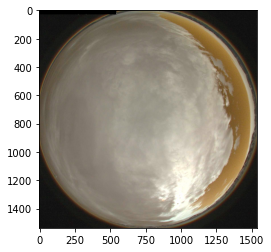

31


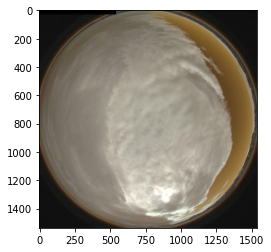

32


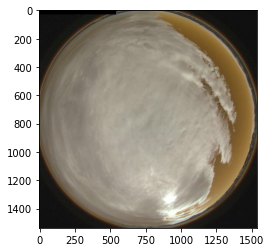

33


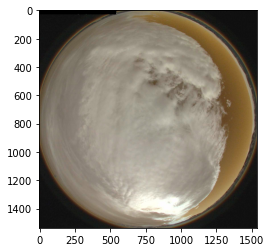

34


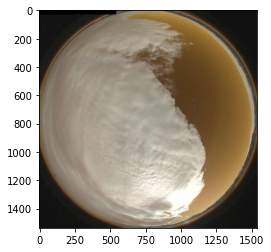

35


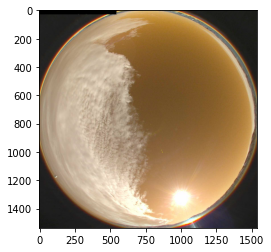

36


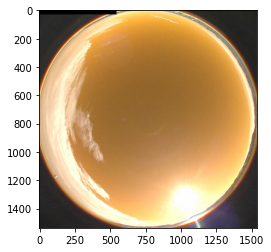

37


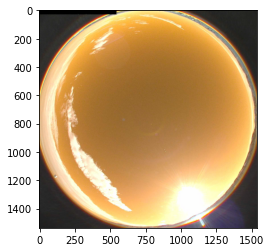

38


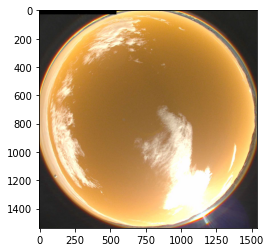

39


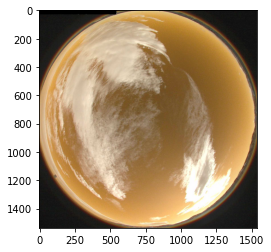

In [50]:
import cv2
for IMG in IMG_filename[30:40]:
    print(IMG_filename.index(IMG))
    img = cv2.imread(IMG)
    plt.imshow(img)
    plt.show()

In [69]:
# Cloud segmentation technique
#%%time
# IMG_features=[]
# IMGSIZE=300
# import cv2
# for IMG in IMG_filename[30:40]:
#     img = cv2.imread(IMG)
#     img=cv2.resize(img,(IMGSIZE,IMGSIZE))
# #     print(img.shape)
    
# #     print(img.shape)
# #     print(IMG_filename.index(IMG))
#     # Convert the image to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# #     blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
#     # Apply thresholding to create a binary image
#     thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)[1]
# #     thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

#     # Apply morphological operations to clean up the binary image
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
#     closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
#     opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
# #     print(opened.shape)
# #     print(opened)
#     IMG_features.append(opened)
# #     # Apply morphological operations to the binary mask
# #     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
# #     closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# #     opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)

# #     # Apply the binary mask to the original image
# #     result = cv2.bitwise_and(img, img, mask=opened)
#     plt.imshow(opened)
#     plt.show()


In [68]:
#adaptive thresholding technique
# %time x=2+2
# take time to convert all image about 10 min 
IMG_features=[]
IMGSIZE=300
import cv2
for IMG in IMG_filename:
    img = cv2.imread(IMG)
    img=cv2.resize(img,(IMGSIZE,IMGSIZE))
    
    #Creating mask 
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    center = (img.shape[1] // 2, img.shape[0] // 2)
    radius = min(center)
    cv2.circle(mask, center, radius, (255, 255, 255), -1, cv2.LINE_AA)

    # apply the mask to the image
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    # convert the image to grayscale
    gray_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)

    # apply adaptive thresholding
    thresh_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    IMG_features.append(thresh_img)


In [70]:
UsefulData.columns

Index(['DATE (MM/DD)', 'MST', 'Global CMP22 (vent/cor) [W/m^2]',
       'Direct sNIP [W/m^2]', 'Azimuth Angle [degrees]',
       'Tower Dry Bulb Temp [deg C]', 'Tower Wet Bulb Temp [deg C]',
       'Tower Dew Point Temp [deg C]', 'Total Cloud Cover [%]',
       'Peak Wind Speed @ 6ft [m/s]', 'Precipitation (Accumulated) [mm]',
       'Moisture', 'Albedo (CMP11)'],
      dtype='object')

In [93]:
X_features=UsefulData.drop(["Total Cloud Cover [%]",'DATE (MM/DD)', 'MST'],axis=1).values
label=UsefulData['Total Cloud Cover [%]'].values

In [94]:
#(1536, 1536, 3)
print(X_features.shape);
print(type(X_features))
label.shape
# X_features.shape

(20873, 10)
<class 'numpy.ndarray'>


(20873,)

In [96]:
X_features = np.reshape(X_features, (X_features.shape[0], X_features.shape[1], 1))

In [97]:
X_features.shape

(20873, 10, 1)

In [74]:
IMG_features=np.array(IMG_features).reshape(-1,300,300,1)

In [103]:
Counter(label)

Counter({0.0: 1770,
         13.0: 466,
         25.0: 168,
         37.0: 102,
         15.0: 392,
         18.0: 333,
         10.0: 499,
         14.0: 410,
         28.0: 135,
         12.0: 533,
         59.0: 95,
         81.0: 124,
         92.0: 183,
         95.0: 429,
         96.0: 561,
         97.0: 709,
         91.0: 195,
         89.0: 158,
         90.0: 187,
         82.0: 116,
         48.0: 76,
         43.0: 91,
         19.0: 308,
         33.0: 118,
         65.0: 92,
         34.0: 105,
         16.0: 346,
         5.0: 303,
         4.0: 207,
         7.0: 423,
         2.0: 91,
         1.0: 49,
         74.0: 118,
         85.0: 144,
         84.0: 135,
         86.0: 134,
         80.0: 121,
         75.0: 109,
         63.0: 94,
         69.0: 90,
         78.0: 113,
         66.0: 77,
         76.0: 88,
         54.0: 84,
         49.0: 104,
         52.0: 88,
         62.0: 97,
         77.0: 127,
         79.0: 102,
         71.0: 93,
         72.0: 102,

In [83]:
IMG_features.shape

(20873, 300, 300, 1)

In [99]:
pickle_out=open("IMG_features.pickle","wb")
pickle.dump(IMG_features,pickle_out)
pickle_out.close()

pickle_out=open("X_features.pickle","wb")
pickle.dump(X_features,pickle_out)
pickle_out.close()

pickle_out=open("label.pickle","wb")
pickle.dump(label,pickle_out)
pickle_out.close()

## Hybrid model for both timeseries and Image Data 

In [110]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, LSTM, concatenate

# define input shapes for image and time-series data
img_input_shape = (300, 300, 1) # assuming image size is 300x300 and it has 1 color channel
ts_input_shape = (10,1) # assuming time-series data has 10 time steps and 1 feature

# define image processing layers
img_input = Input(shape=img_input_shape)
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(img_input)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(conv1)
flatten1 = Flatten()(conv2)

# define time-series data processing layers
ts_input = Input(shape=ts_input_shape)
lstm1 = LSTM(32, activation='relu')(ts_input)
flatten2 = Flatten()(lstm1)

# concatenate image and time-series data processing layers
concatenated = concatenate([flatten1, flatten2])

# add final classification layer
output = Dense(1, activation='linear')(concatenated)

# define the model with input and output layers
model = Model(inputs=[img_input, ts_input], outputs=output)

# compile the model with appropriate optimizer, loss function and metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# train the model with image and time-series data
# history = model.fit([img_data, ts_data], labels, epochs=10, batch_size=32, validation_split=0.2)


In [108]:
# from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, LSTM, concatenate, GlobalMaxPooling1D
# from tensorflow.keras.models import Model

# # define input shapes for image and time-series data
# img_input_shape = (300, 300, 1) # assuming image size is 224x224 and it has 3 color channels
# ts_input_shape = (10, 1) # assuming time-series data has 10 time steps and 5 features

# # define image processing layers
# img_input = Input(shape=img_input_shape)
# conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(img_input)
# conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(conv1)
# maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv2)

# # define time-series data processing layers
# ts_input = Input(shape=ts_input_shape)
# lstm1 = LSTM(32, activation='relu', return_sequences=True)(ts_input)
# pool1 = GlobalMaxPooling1D()(lstm1)

# # concatenate image and time-series data processing layers
# concatenated = concatenate([maxpool1, pool1])

# # add final regression layer
# output = Dense(1)(concatenated)

# # define the model with input and output layers
# model = Model(inputs=[img_input, ts_input], outputs=output)

# # compile the model with appropriate optimizer and loss function
# model.compile(optimizer='adam', loss='mean_squared_error')



In [111]:
history = model.fit([IMG_features, X_features], label, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
522/522 [==============================] - 1794s 3s/step - loss: 5864956.5000 - mean_absolute_error: 363.3922 - val_loss: 764.8692 - val_mean_absolute_error: 19.8754
Epoch 2/5
522/522 [==============================] - 1759s 3s/step - loss: 606.7430 - mean_absolute_error: 18.9108 - val_loss: 420.0537 - val_mean_absolute_error: 15.6572
Epoch 3/5
522/522 [==============================] - 1862s 4s/step - loss: 416.8770 - mean_absolute_error: 15.4929 - val_loss: 350.8330 - val_mean_absolute_error: 14.5151
Epoch 4/5
522/522 [==============================] - 1953s 4s/step - loss: 363.7379 - mean_absolute_error: 14.2601 - val_loss: 344.6416 - val_mean_absolute_error: 14.5222
Epoch 5/5
522/522 [==============================] - 1961s 4s/step - loss: 326.2238 - mean_absolute_error: 13.4486 - val_loss: 265.3629 - val_mean_absolute_error: 11.7589


In [113]:
model.predict([IMG_features,X_features])

653/653 [==============================] - 566s 866ms/step


array([[  1.8499792],
       [ 35.008926 ],
       [ 46.52544  ],
       ...,
       [-10.291237 ],
       [ -3.5131075],
       [ -4.3888702]], dtype=float32)

In [114]:
label

array([ 0., 13., 25., ...,  2.,  0.,  0.])

In [115]:
model.save("Cloud_coverage.model")

INFO:tensorflow:Assets written to: Cloud_coverage.model\assets


INFO:tensorflow:Assets written to: Cloud_coverage.model\assets


In [35]:
new_model=load_model("Cloud_coverage.model")

In [36]:
pickle_in=open("IMG_features.pickle","rb")
IMG_features=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open("X_features.pickle","rb")
X_features=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open("label.pickle","rb")
label=pickle.load(pickle_in)
pickle_in.close()

In [39]:
print(IMG_features.shape)
print(X_features.shape)
print(label.shape)

(20873, 300, 300, 1)
(20873, 10, 1)
(20873,)


In [50]:
new_model.predict([IMG_features[10:20],X_features[10:20]])

1/1 [==============================] - 0s 347ms/step


array([[64.378525 ],
       [-3.0100138],
       [ 4.344116 ],
       [30.754564 ],
       [51.051777 ],
       [91.60104  ],
       [85.04344  ],
       [85.661896 ],
       [91.615105 ],
       [86.6847   ]], dtype=float32)

In [51]:
label[10:20]

560    12.0
570    13.0
580    18.0
590    59.0
600    81.0
610    92.0
620    95.0
630    95.0
640    96.0
650    97.0
Name: Total Cloud Cover [%], dtype: float64